In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df = pd.read_csv('D://code//data//data_SA_north//Taian.csv', low_memory=False)

In [3]:
df['ENTRY_TIME'] = pd.to_datetime(df['ENTRY_TIME'],infer_datetime_format=True)

In [4]:
df['EXIT_TIME'] = pd.to_datetime(df['EXIT_TIME'],infer_datetime_format=True)

In [5]:
df['O_TIME'] = pd.to_datetime(df['O_TIME'],infer_datetime_format=True)

In [6]:
df['D_TIME'] = pd.to_datetime(df['D_TIME'],infer_datetime_format=True)

In [7]:
start_min = [00, 11, 21, 31, 41, 51]
end_min = [10, 20, 30, 40, 50, 59]
directions = ['N', 'S']
days = [21, 22, 23, 24, 25, 26, 27]
categories = [31, 32, 41, 42, 5]
hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
small_car = [31, 32]
big_car = [42, 5]
big_41 = [41]
n_cats = [small_car, big_41, big_car]


In [8]:
start_min = [00, 11, 21, 31, 41, 51]
end_min = [10, 20, 30, 40, 50, 59]
col_min = []
for i in hours:
    for j in enumerate(start_min):
        string = "{0}:{1}-{0}:{2}".format(i, j[1], end_min[j[0]])
        col_min.append(string)
        #print(string)

#### #進入服務區車次統計 (與主線比較占比//分五車種)
writing a function that can process each SA stop, and output a dataframe which can be writen into excel or csv

In [15]:
def state_amount_cars_sty1(df, stop_col):
    
    # deter whether the SA has divived into N,S two station
    # but the data format isnt accomplished yet
    
    list_31 = []
    list_32 = []
    list_41 = []
    list_42 = []
    list_5 = []

    for day in days :

        for category in categories :

            for dire in directions :    

                cnt_var = df[(df.ENTRY_TIME.dt.day == day) & (df.MVDIS_CATEGORY == category) & (df.DIRECTION_ID == dire)].shape[0]
                in_var = df[(df[stop_col] == 'P')&(df.ENTRY_TIME.dt.day == day) & (df.MVDIS_CATEGORY == category)& (df.DIRECTION_ID == dire)].shape[0]
                per_var = round(float((in_var/cnt_var)*100.0), 2)
                pecentage_var = "{0} %".format(per_var)

                if category == 31 :
                    list_31.append(in_var)
                    list_31.append(cnt_var)
                    list_31.append(pecentage_var)
                elif category == 32 :
                    list_32.append(in_var)
                    list_32.append(cnt_var)
                    list_32.append(pecentage_var)
                elif category == 41 :
                    list_41.append(in_var)
                    list_41.append(cnt_var)
                    list_41.append(pecentage_var)
                elif category == 42 :
                    list_42.append(in_var)
                    list_42.append(cnt_var)
                    list_42.append(pecentage_var)
                elif category == 5 :
                    list_5.append(in_var)
                    list_5.append(cnt_var)
                    list_5.append(pecentage_var)
    
    iterables = [['21', '22', '23', '24', '25', '26', '27'], ['N', 'S'], ['in', 'total', 'percentage']]
    col = pd.MultiIndex.from_product(iterables)
    final_df = pd.DataFrame([list_31, list_32, list_41, list_42, list_5], index=['31', '32', '41', '42', '5'], columns=col)
    # if needed a index_version dataframe, use transpose()
    
    return final_df

In [16]:
df_taian = state_amount_cars_sty1(df, 'STOP')

In [11]:
df_1

21                                              22                    \
       N                       S                       N                     
      in  total percentage    in  total percentage    in  total percentage   
31  2533  25190  10.055578  2933  21900  13.392694  1967  21424   9.181292   
32   768   8532   9.001406   968   7740  12.506460   694   8076   8.593363   
41   150   1997   7.511267   152   1987   7.649723   164   1802   9.100999   
42   301   3383   8.897428   281   2889   9.726549   344   4058   8.477082   
5    245   2199  11.141428    80   1421   5.629838   304   2637  11.528252   

            ...             26                            27         \
       S    ...              N     S                       N          
      in    ...     percentage    in  total percentage    in  total   
31  2683    ...      10.870653  6790  42165  16.103403  5327  46216   
32   905    ...      10.128519  1511   9965  15.163071  1074   9780   
41   142    ...      14.035088   601   3098  19.399613   505   3512   
42   347    ...       6.967670   124   1818   6.820682    63    757   
5     70    ...      13.152926    55   1059   5.193579   154    747   

                                       
                  S                    
   percentage    in  total percentage  
31  11.526311  5050  36858  13.701232  
32  10.981595  1192   8304  14.354528  
41  14.379271   424   3080  13.766234  
42   8.322325    60    834   7.194245  
5   20.615797    14    437   3.203661  

[5 rows x 42 columns]

In [18]:
df_taian.to_excel('D://code//data//data_SA_north//analysis_result//Taian_inSA_carsNum.xlsx', sheet_name='AmountOfCarsIntoSA_Taian')

#### #進入服務區平均停留時間 (分五車種)    


In [111]:
def state_stDuration_cars_sty1(df, stop_col, stop_duration):
    
    # deter whether the SA has divived into N,S two station
    # but the data format isnt accomplished yet
    
    list_31 = []
    list_32 = []
    list_41 = []
    list_42 = []
    list_5 = []

    for day in days :

        for category in categories :

            for dire in directions :    

                #cnt_var = df[(df.ENTRY_TIME.dt.day == day) & (df.MVDIS_CATEGORY == category) & (df.DIRECTION_ID == dire)].shape[0]
                in_var = df[(df[stop_col] == 'P')&(df.ENTRY_TIME.dt.day == day) & (df.MVDIS_CATEGORY == category)& (df.DIRECTION_ID == dire)][stop_duration].mean()
                r_var = round(in_var, 1)
                #per_var = float((in_var/cnt_var)*100.0)

                if category == 31 :
                    list_31.append(r_var)
                    #list_31.append(cnt_var)
                    #list_31.append(per_var)
                elif category == 32 :
                    list_32.append(r_var)
                    #list_32.append(cnt_var)
                    #list_32.append(per_var)
                elif category == 41 :
                    list_41.append(r_var)
                    #list_41.append(cnt_var)
                    #list_41.append(per_var)
                elif category == 42 :
                    list_42.append(r_var)
                    #list_42.append(cnt_var)
                    #list_42.append(per_var)
                elif category == 5 :
                    list_5.append(r_var)
                    #list_5.append(cnt_var)
                    #list_5.append(per_var)
    
    iterables = [['21', '22', '23', '24', '25', '26', '27'], ['N', 'S']]
    col = pd.MultiIndex.from_product(iterables)
    final_df = pd.DataFrame([list_31, list_32, list_41, list_42, list_5], index=['31', '32', '41', '42', '5'], columns=col)
    # if needed a index_version dataframe, use transpose()
    
    return final_df

In [112]:
df_taian_stD = state_stDuration_cars_sty1(df, 'STOP', 'STOP_DURATION')

In [113]:
df_taian_stD 

21          22          23          24          25          26        \
       N     S     N     S     N     S     N     S     N     S     N     S   
31  24.5  23.2  23.9  23.9  23.9  23.2  24.4  23.5  24.5  20.9  24.1  23.2   
32  24.5  24.0  25.2  23.6  25.3  24.1  24.6  24.1  25.1  21.2  25.0  23.5   
41  23.0  25.7  20.6  27.2  23.2  21.3  22.4  24.3  23.0  18.3  21.8  25.7   
42  24.6  28.7  27.4  29.4  28.1  31.3  25.9  27.9  30.0  25.8  26.4  27.3   
5   22.7  31.5  23.6  31.9  23.9  31.7  24.5  36.0  22.8  26.9  23.1  28.9   

      27        
       N     S  
31  24.4  23.2  
32  24.8  24.0  
41  25.1  26.9  
42  25.4  28.3  
5   25.9  32.3

#### #進服務區與total進服務區佔主線比例 by 每日 by HOUR (total車種)

In [116]:
def state_amount_cars_byHOUR(df, stop_col):
    day_dfs = []
    day_dict = {}
    for day in days :
        total_list = []
        #df_names = ["day_df_%s"%x for x in range(9)]
        for hour in hours :
            dire_list = []
            for dire in directions : 
                cnt_var = df[(df.ENTRY_TIME.dt.day == day)&(df.ENTRY_TIME.dt.hour == hour)&(df.DIRECTION_ID == dire)].shape[0]
                in_var = df[(df.STOP == 'P')&(df.ENTRY_TIME.dt.day == day)&(df.ENTRY_TIME.dt.hour == hour)&(df.DIRECTION_ID == dire)].shape[0]
                #out_var = df[(df.STOP == 'T')&(df.ENTRY_TIME.dt.day == day)&(df.ENTRY_TIME.dt.hour == hour)&(df.DIRECTION_ID == dire)].shape[0]
                per_var = round(float((in_var/cnt_var)*100.0), 2)
                pecentage_var = "{0} %".format(per_var)
                dire_list.append(in_var)
                dire_list.append(cnt_var)
                dire_list.append(pecentage_var)
            total_list.append(dire_list)
        iterables = [[day], ['N', 'S'], ['in', 'total', 'percentage']]
        col = pd.MultiIndex.from_product(iterables)
        
        
        day_dict['day_df_%s'%day] = pd.DataFrame(total_list, index=hours, columns=col)
        
        day_dfs.append(day_dict['day_df_%s'%day])
        
    result_df = pd.concat(day_dfs, axis=1) 
    
    return result_df

In [37]:
df_taian_HOUR = state_amount_cars_byHOUR(df, "STOP")

In [39]:
df_taian_HOUR.to_excel('D://code//data//data_SA_north//analysis_result//Taian_inSA_carsNum.xlsx', sheet_name='byHOUR_AmountOfCarsIntoSA_Taian')

#### #進服務區與total進服務區佔主線比例 by 每日 by HOUR (total車種), NS分開擺

In [117]:
def state_amount_cars_byHOUR_NS(df, stop_col):
    day_dfs = []
    day_dict = {}
    for dire in directions :
        total_list = []
        for hour in hours :
            dire_list = []
            #df_names = ["day_df_%s"%x for x in range(9)]
            for day in days :
                
             
                cnt_var = df[(df.ENTRY_TIME.dt.day == day)&(df.ENTRY_TIME.dt.hour == hour)&(df.DIRECTION_ID == dire)].shape[0]
                in_var = df[(df.STOP == 'P')&(df.ENTRY_TIME.dt.day == day)&(df.ENTRY_TIME.dt.hour == hour)&(df.DIRECTION_ID == dire)].shape[0]
                #out_var = df[(df.STOP == 'T')&(df.ENTRY_TIME.dt.day == day)&(df.ENTRY_TIME.dt.hour == hour)&(df.DIRECTION_ID == dire)].shape[0]
                per_var = round(float((in_var/cnt_var)*100.0), 2)
                pecentage_var = "{0} %".format(per_var)
                dire_list.append(in_var)
                dire_list.append(cnt_var)
                dire_list.append(pecentage_var)
            total_list.append(dire_list)
        iterables = [[dire], days, ['in', 'total', 'percentage']]
        col = pd.MultiIndex.from_product(iterables)
        
        
        day_dict['direct_df_%s'%dire] = pd.DataFrame(total_list, index=hours, columns=col)
        
        day_dfs.append(day_dict['direct_df_%s'%dire])
        
    result_df = pd.concat(day_dfs, axis=1) 
    
    return result_df

In [118]:
df_taian_HOUR_T_NS = state_amount_cars_byHOUR_NS(df, 'STOP')

In [119]:
df_taian_HOUR_T_NS

N                                                                    \
     21                    22                    23                    24   
     in total percentage   in total percentage   in total percentage   in   
0    75   756     9.92 %   64   585    10.94 %   43   524     8.21 %   45   
1    54   456    11.84 %   48   511     9.39 %   37   477     7.76 %   36   
2    37   394     9.39 %   47   519     9.06 %   37   449     8.24 %   31   
3    32   420     7.62 %   48   533     9.01 %   38   511     7.44 %   39   
4    55   695     7.91 %   73   756     9.66 %   54   583     9.26 %   56   
5    58  1304     4.45 %   55  1012     5.43 %   57   884     6.45 %   66   
6   110  2201      5.0 %   85  1434     5.93 %   63  1259      5.0 %   67   
7   154  2616     5.89 %  133  2169     6.13 %  147  2062     7.13 %  139   
8   214  2773     7.72 %  181  2747     6.59 %  201  2583     7.78 %  223   
9   201  2643      7.6 %  196  2782     7.05 %  201  2810     7.15 %  224   
10  223  2493     8.95 %  199  2449     8.13 %  195  2336     8.35 %  208   
11  263  2386    11.02 %  237  2172    10.91 %  210  2121      9.9 %  215   
12  271  2098    12.92 %  255  2024     12.6 %  286  2086    13.71 %  253   
13  229  2097    10.92 %  217  2047     10.6 %  247  2121    11.65 %  216   
14  346  2513    13.77 %  277  2271     12.2 %  247  2178    11.34 %  292   
15  323  2541    12.71 %  246  2218    11.09 %  247  2216    11.15 %  259   
16  303  2367     12.8 %  244  2285    10.68 %  233  2260    10.31 %  309   
17  249  2100    11.86 %  186  1972     9.43 %  179  1977     9.05 %  218   
18  169  1735     9.74 %  189  1582    11.95 %  168  1608    10.45 %  145   
19  164  1496    10.96 %  141  1418     9.94 %  148  1496     9.89 %  153   
20  172  1666    10.32 %  126  1374     9.17 %  116  1470     7.89 %  135   
21  133  1498     8.88 %  104  1374     7.57 %  123  1392     8.84 %  112   
22  118  1246     9.47 %   89  1122     7.93 %   95  1129     8.41 %   89   
23   44   807     5.45 %   33   641     5.15 %   44   730     6.03 %   47   

      ...              S                                                    \
      ...             24    25                    26                    27   
      ...     percentage    in total percentage   in total percentage   in   
0     ...          7.7 %    57   729     7.82 %  187  1340    13.96 %  101   
1     ...         4.68 %    43   568     7.57 %  109   834    13.07 %   77   
2     ...         7.99 %    30   419     7.16 %   69   631    10.94 %   50   
3     ...         8.93 %    29   407     7.13 %   60   521    11.52 %   35   
4     ...         7.84 %    36   388     9.28 %   94   551    17.06 %   51   
5     ...        11.15 %    70   549    12.75 %  148   843    17.56 %   76   
6     ...        10.55 %   101   926    10.91 %  330  1729    19.09 %  152   
7     ...        12.71 %   250  1635    15.29 %  676  2939     23.0 %  328   
8     ...        16.57 %   289  1887    15.32 %  729  3384    21.54 %  394   
9     ...        17.21 %   360  2256    15.96 %  771  3674    20.99 %  458   
10    ...        15.19 %   382  2480     15.4 %  664  3788    17.53 %  424   
11    ...        15.12 %   420  2631    15.96 %  757  4400     17.2 %  352   
12    ...        15.44 %   377  2511    15.01 %  579  3424    16.91 %  331   
13    ...         12.2 %   352  2514     14.0 %  547  3505    15.61 %  344   
14    ...        11.99 %   419  2903    14.43 %  517  3576    14.46 %  462   
15    ...        14.33 %   441  3041     14.5 %  534  3582    14.91 %  490   
16    ...        12.49 %   427  3195    13.36 %  557  3593     15.5 %  516   
17    ...         9.43 %   370  3381    10.94 %  404  3378    11.96 %  506   
18    ...         9.81 %  1519  2917    52.07 %  348  3051    11.41 %  382   
19    ...         9.25 %   365  3028    12.05 %  248  2302    10.77 %  329   
20    ...        10.62 %   381  3254    11.71 %  230  2108    10.91 %  316   
21    ...        10.87 %   345  2973     11.6 %  206  

#### #進服務區車次佔主線比例 by day by HOUR 分車種(產五頁ws)

In [46]:
def state_amount_cars_byHOUR_carTypes(df, stop_col, cartype):
    day_dfs = []
    day_dict = {}
    
    for day in days :
        total_list = []
        #df_names = ["day_df_%s"%x for x in range(9)]
        for hour in hours :
            dire_list = []
            for dire in directions : 
                cnt_var = df[(df.ENTRY_TIME.dt.day == day)&(df.ENTRY_TIME.dt.hour == hour)&(df.DIRECTION_ID == dire)&(df.MVDIS_CATEGORY == cartype)].shape[0]
                in_var = df[(df.STOP == 'P')&(df.ENTRY_TIME.dt.day == day)&(df.ENTRY_TIME.dt.hour == hour)&(df.DIRECTION_ID == dire)&(df.MVDIS_CATEGORY == cartype)].shape[0]
                #out_var = df[(df.STOP == 'T')&(df.ENTRY_TIME.dt.day == day)&(df.ENTRY_TIME.dt.hour == hour)&(df.DIRECTION_ID == dire)&(df.MVDIS_CATEGORY == cartype)].shape[0]
                per_var = round(float((in_var/cnt_var)*100.0), 2)
                pecentage_var = "{0} %".format(per_var)
                dire_list.append(in_var)
                dire_list.append(cnt_var)
                dire_list.append(pecentage_var)
            total_list.append(dire_list)
        iterables = [[day], ['N', 'S'], ['in', 'total', 'percentage']]
        col = pd.MultiIndex.from_product(iterables)
        
        
        day_dict['day_df_%s'%day] = pd.DataFrame(total_list, index=hours, columns=col)
        
        day_dfs.append(day_dict['day_df_%s'%day])
        
    result_df = pd.concat(day_dfs, axis=1) 
    
    return result_df

#### #進服務區車次佔主線比例 by day by HOUR 分車種(產五頁ws), divided NS

In [121]:
def state_amount_cars_byHOUR_carTypes_NS(df, stop_col, cartype):
    day_dfs = []
    day_dict = {}
    for dire in directions :
        total_list = []
        for hour in hours :
            dire_list = []
            #df_names = ["day_df_%s"%x for x in range(9)]
            for day in days :
                
             
                cnt_var = df[(df.ENTRY_TIME.dt.day == day)&(df.ENTRY_TIME.dt.hour == hour)&(df.DIRECTION_ID == dire)&(df.MVDIS_CATEGORY == cartype)].shape[0]
                in_var = df[(df.STOP == 'P')&(df.ENTRY_TIME.dt.day == day)&(df.ENTRY_TIME.dt.hour == hour)&(df.DIRECTION_ID == dire)&(df.MVDIS_CATEGORY == cartype)].shape[0]
                #out_var = df[(df.STOP == 'T')&(df.ENTRY_TIME.dt.day == day)&(df.ENTRY_TIME.dt.hour == hour)&(df.DIRECTION_ID == dire)&(df.MVDIS_CATEGORY == cartype)].shape[0]
                per_var = round(float((in_var/cnt_var)*100.0), 2)
                pecentage_var = "{0} %".format(per_var)
                dire_list.append(in_var)
                dire_list.append(cnt_var)
                dire_list.append(pecentage_var)
            total_list.append(dire_list)
        iterables = [[dire], days, ['in', 'total', 'percentage']]
        col = pd.MultiIndex.from_product(iterables)
        
        
        day_dict['direct_df_%s'%dire] = pd.DataFrame(total_list, index=hours, columns=col)
        
        day_dfs.append(day_dict['direct_df_%s'%dire])
        
    result_df = pd.concat(day_dfs, axis=1) 
    
    return result_df

In [122]:
df_taian_HOUR_31_NS = state_amount_cars_byHOUR_carTypes_NS(df, "STOP", 31)
df_taian_HOUR_32_NS = state_amount_cars_byHOUR_carTypes_NS(df, "STOP", 32)
df_taian_HOUR_41_NS = state_amount_cars_byHOUR_carTypes_NS(df, "STOP", 41)
df_taian_HOUR_42_NS = state_amount_cars_byHOUR_carTypes_NS(df, "STOP", 42)
df_taian_HOUR_5_NS = state_amount_cars_byHOUR_carTypes_NS(df, "STOP", 5)

In [47]:
df_taian_HOUR_31 = state_amount_cars_byHOUR_carTypes(df, 'STOP', 31)

In [50]:
df_taian_HOUR_32 = state_amount_cars_byHOUR_carTypes(df, 'STOP', 32)
df_taian_HOUR_41 = state_amount_cars_byHOUR_carTypes(df, 'STOP', 41)
df_taian_HOUR_42 = state_amount_cars_byHOUR_carTypes(df, 'STOP', 42)
df_taian_HOUR_5 = state_amount_cars_byHOUR_carTypes(df, 'STOP', 5)

#### #各時段進入車輛數vs停留時間(by 10 minute)

In [57]:
def cars_amount_stD_Day(df, days, stop_col, category) :
    day_dfs = []
    day_dict = {}
    
    categories = [31, 32, 41, 42, 5]
    hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
    start_min = [0, 11, 21, 31, 41, 51]
    end_min = [10, 20, 30, 40, 50, 59]
    directions = ['N', 'S']
    
    
    for day in days :
        total_list = []
        
        for hour in hours :
            
            for num in enumerate(start_min):
                dire_list = []
                for dire in directions : 

                    cnt_var = df[(df.ENTRY_TIME.dt.day == day)& (df[stop_col] == 'P')  &(df.DIRECTION_ID == dire)& (df.MVDIS_CATEGORY == category) & (df.ENTRY_TIME.dt.hour == hour) & (df.ENTRY_TIME.dt.minute >= num[1]) & (df.ENTRY_TIME.dt.minute <= end_min[num[0]])].shape[0]
                    stD_var = df[(df.ENTRY_TIME.dt.day == day)& (df[stop_col] == 'P')  &(df.DIRECTION_ID == dire)& (df.MVDIS_CATEGORY == category) & (df.ENTRY_TIME.dt.hour == hour) & (df.ENTRY_TIME.dt.minute >= num[1]) & (df.ENTRY_TIME.dt.minute <= end_min[num[0]])]['STOP_DURATION'].mean()

                    r_stD_var = round(stD_var, 2)

                    dire_list.append(cnt_var)
                    dire_list.append(r_stD_var)

                total_list.append(dire_list)
        iterables = [[day], ['N', 'S'], ['in', 'stop_duration']]
        col = pd.MultiIndex.from_product(iterables)
        
        
        day_dict['day_df_%s'%day] = pd.DataFrame(total_list, index=col_min, columns=col)
        
        day_dfs.append(day_dict['day_df_%s'%day])
        
    result_df = pd.concat(day_dfs, axis=1) 
    
    return result_df

#### #各時段進入車輛數vs停留時間(by 10 minute), divided NS

In [125]:
def cars_amount_stD_Day_NS(df, days, stop_col, category) :
    day_dfs = []
    day_dict = {}
    
    categories = [31, 32, 41, 42, 5]
    hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
    start_min = [0, 11, 21, 31, 41, 51]
    end_min = [10, 20, 30, 40, 50, 59]
    directions = ['N', 'S']
    
    
    for dire in directions : 
        total_list = []
        
        for hour in hours :
            
            for num in enumerate(start_min):
                dire_list = []
                for day in days :

                    cnt_var = df[(df.ENTRY_TIME.dt.day == day)& (df[stop_col] == 'P')  &(df.DIRECTION_ID == dire)& (df.MVDIS_CATEGORY == category) & (df.ENTRY_TIME.dt.hour == hour) & (df.ENTRY_TIME.dt.minute >= num[1]) & (df.ENTRY_TIME.dt.minute <= end_min[num[0]])].shape[0]
                    stD_var = df[(df.ENTRY_TIME.dt.day == day)& (df[stop_col] == 'P')  &(df.DIRECTION_ID == dire)& (df.MVDIS_CATEGORY == category) & (df.ENTRY_TIME.dt.hour == hour) & (df.ENTRY_TIME.dt.minute >= num[1]) & (df.ENTRY_TIME.dt.minute <= end_min[num[0]])]['STOP_DURATION'].mean()

                    r_stD_var = round(stD_var, 2)

                    dire_list.append(cnt_var)
                    dire_list.append(r_stD_var)

                total_list.append(dire_list)
        iterables = [[dire], days, ['in', 'stop_duration']]
        col = pd.MultiIndex.from_product(iterables)
        
        
        day_dict['direct_df_%s'%dire] = pd.DataFrame(total_list, index=col_min, columns=col)
        
        day_dfs.append(day_dict['direct_df_%s'%dire])
        
    result_df = pd.concat(day_dfs, axis=1) 
    
    return result_df

In [127]:
df_taian_stDcnt_31_NS = cars_amount_stD_Day_NS(df, days, "STOP", 31)
df_taian_stDcnt_32_NS = cars_amount_stD_Day_NS(df, days, "STOP", 32)
df_taian_stDcnt_41_NS = cars_amount_stD_Day_NS(df, days, "STOP", 41)
df_taian_stDcnt_42_NS = cars_amount_stD_Day_NS(df, days, "STOP", 42)
df_taian_stDcnt_5_NS = cars_amount_stD_Day_NS(df, days, "STOP", 5)

In [59]:
df_taian_stDcnt_ = cars_amount_stD_Day(df, days, 'STOP', 31)

In [61]:
df_taian_stDcnt_32 = cars_amount_stD_Day(df, days, 'STOP', 32)
df_taian_stDcnt_41 = cars_amount_stD_Day(df, days, 'STOP', 41)
df_taian_stDcnt_42 = cars_amount_stD_Day(df, days, 'STOP', 42)
df_taian_stDcnt_5 = cars_amount_stD_Day(df, days, 'STOP', 5)

In [62]:
df_taian_stDcnt_32

21                                 22                   \
             N                 S                N                S   
            in stop_duration  in stop_duration in stop_duration in   
0:0-0:10     1         18.00   3         18.67  2         16.50  3   
0:11-0:20    2         19.50   2         43.00  0           NaN  0   
0:21-0:30    1         14.00   2         47.00  0           NaN  5   
0:31-0:40    0           NaN   2         23.00  1         61.00  2   
0:41-0:50    1         17.00   4         12.25  2         17.50  0   
0:51-0:59    3         19.67   2         14.50  2         10.00  1   
1:0-1:10     0           NaN   1         14.00  0           NaN  1   
1:11-1:20    0           NaN   1         25.00  2         48.50  0   
1:21-1:30    1         28.00   2         43.50  0           NaN  0   
1:31-1:40    3         27.67   2         16.00  2         23.50  2   
1:41-1:50    2         23.00   0           NaN  1          9.00  1   
1:51-1:59    1         22.00   1         31.00  1         46.00  0   
2:0-2:10     1         18.00   0           NaN  0           NaN  2   
2:11-2:20    2         28.00   1         39.00  1         49.00  3   
2:21-2:30    1         21.00   0           NaN  1          8.00  1   
2:31-2:40    3         22.67   1         15.00  2         16.00  0   
2:41-2:50    2         51.00   0           NaN  2         12.50  1   
2:51-2:59    0           NaN   0           NaN  1         30.00  1   
3:0-3:10     0           NaN   1         33.00  0           NaN  0   
3:11-3:20    0           NaN   2         15.00  0           NaN  0   
3:21-3:30    0           NaN   0           NaN  0           NaN  1   
3:31-3:40    0           NaN   0           NaN  1         10.00  4   
3:41-3:50    1         22.00   1         13.00  1         17.00  0   
3:51-3:59    0           NaN   0           NaN  1         12.00  2   
4:0-4:10     2         37.00   0           NaN  0           NaN  1   
4:11-4:20    3         38.67   1         10.00  2         34.50  1   
4:21-4:30    1          9.00   2         20.50  2         20.50  0   
4:31-4:40    1         25.00   2         11.50  2         30.00  4   
4:41-4:50    1         35.00   5         21.60  2         32.50  2   
4:51-4:59    3         32.00   1          8.00  1         12.00  1   
...         ..           ...  ..           ... ..           ... ..   
19:0-19:10   7         20.29   8         25.00  2         20.50  5   
19:11-19:20  3         41.67   5         26.60  7         20.29  9   
19:21-19:30  7         24.14   6         20.00  5         22.20  6   
19:31-19:40  6         40.33   4         35.75  6         25.33  5   
19:41-19:50  4         22.00   6         18.17  3         40.67  5   
19:51-19:59  5         25.20   2         10.50  3         42.67  6   
20:0-20:10   4         12.00   3         27.33  6         32.33  6   
20:11-20:20  4         24.25  10         20.60  4         37.25  2   
20:21-20:30  5         23.40   4         13.50  3         31.67  3   
20:31-20:40  1         20.00   1         15.00  2         14.50  6   
20:41-20:50  3         21.00   1         10.00  4         16.00  3   
20:51-20:59  1         27.00   1         14.00  4         22.75  3   
21:0-21:10   5         17.80   7         23.14  6         27.00  6   
21:11-21:20  1         11.00   2         16.00  1         19.00  5   
21:21-21:30  7         13.14   5         24.60  0           NaN  4   
21:31-21:40  1         35.00   1         26.00  3         16.00  5   
21:41-21:50  3         13.00   2         23.00  3         15.67  4   
21:51-21:59  2         23.50   5         19.20  4         14.75  2   
22:0-22:10   4         14.00   0           NaN  2         18.00  2   
22:11-22:20  4         23.00   5         16.60  1         11.00  1   
22:21-22:30  1         27.00   2         82.00  7         23.86  2   
22:31-22:40  0           NaN   2         17.00  3         13.67  3   
22:41-22:50  2         33.50   3         16.67  2         43.50  1   
22:51-22:59  2        

#### #進入服務區_性別比 for each SA, everyday, 分車種

In [84]:
def trans_gender(x):
    if x == "女":
        x = 'Female'
    elif x == "男":
        x = 'Male'
    else :
        x = 'Non'
    return x

In [85]:
df['Gender'] = df['Gender'] .apply(trans_gender)

In [107]:
def M_FM_percentage(df):
    total_list = []
    
    for day in days :
        record = []
        for dire in directions :
            for category in categories:
                result_series = df[(df.ENTRY_TIME.dt.day == day)&(df.DIRECTION_ID == dire)&(df.MVDIS_CATEGORY == category)].groupby("Gender").size()
                
                if hasattr(result_series, 'Female'):
                    fm = result_series.Female
                    record.append(fm)
                else :
                    value = 0
                    record.append(value)
                if hasattr(result_series, 'Male'):
                    m = result_series.Male
                    record.append(m)
                else :
                    value = 0
                    record.append(value)
                if hasattr(result_series, 'Non'):
                    non = result_series.Non
                    record.append(non)
                else :
                    value = 0
                    record.append(value)
                
        total_list.append(record)
    iterables = [['N', 'S'], ['31', '32', '41', '42', '5'], ['Female', 'Male', 'Non']]
    col = pd.MultiIndex.from_product(iterables)
    
    result_df = pd.DataFrame(total_list, index=days, columns=col)
    
    return result_df
                

In [108]:
FMF_df = M_FM_percentage(df)

In [109]:
FMF_df

N                                                           ...   \
       31                  32                 41                42  ...    
   Female   Male   Non Female  Male   Non Female Male   Non Female  ...    
21  10864  10328  3998   2070  2868  3594      0    0  1997      0  ...    
22   9102   8159  4163   1837  2469  3770      0    0  1802      0  ...    
23   8546   8179  4312   1719  2459  3931      0    0  1713      0  ...    
24   8923   8429  4307   1676  2509  4124      0    0  1726      0  ...    
25  11220  10360  4590   2183  2892  4157      0    0  2329      0  ...    
26  19252  16312  4406   3623  3884  2297      0    0  3021      0  ...    
27  22154  19518  4544   3861  4132  1787      0    0  3512      0  ...    

       S                                                        
      32     41                42                 5             
     Non Female Male   Non Female Male   Non Female Male   Non  
21  3394      0    0  1987      0    3  2886      0    0  1421  
22  3747      0    0  1796      0    3  3844      0    0  1983  
23  3925      0    0  1744      0    7  3623      0    0  2099  
24  3930      0    0  1685      0    2  3786      0    0  2208  
25  4008      0    0  2356      0    4  3741      0    0  1933  
26  2254      0    0  3098      0    3  1815      0    0  1059  
27  1547      0    0  3080      0    2   832      0    0   437  

[7 rows x 30 columns]

#### #進入服務區車_車廠(各SA)

In [173]:
def stat_car_brand_eachSA(df):
    directions_dfs = []
        
    for dire in directions :
        group_dict = {}
        cat_dfs = []
        for day in days :
            
            # for each car type
            for category in categories :
                series = df[(df.ENTRY_TIME.dt.day == day) & (df["STOP"] == 'P')  &(df.DIRECTION_ID == dire)& (df.MVDIS_CATEGORY == category)]\
                .groupby("BRAND").size().sort_values(0, ascending=False)[:20]
                tmp_df = pd.DataFrame(series).reset_index()
                #tmp_df.index = list(range(1, 21))
                #tmp_df.columns = ["BRAND", "car_num"]
                
                group_dict['{0}_{1}'.format(day, category)] = tmp_df
                cat_dfs.append(group_dict['{0}_{1}'.format(day, category)])
            
            # for total car types grouping
            series_total = df[(df.ENTRY_TIME.dt.day == day) & (df["STOP"] == 'P')  &(df.DIRECTION_ID == dire)].groupby("BRAND")\
            .size().sort_values(0, ascending=False)[:20]
            total_df = pd.DataFrame(series_total).reset_index()
            #total_df.index = list(range(1, 21))
            #total_df.columns = ["BRAND", "car_num"]
            
            group_dict['{0}_total'.format(day)] = total_df
            cat_dfs.append(group_dict['{0}_total'.format(day)])
            ## end session ## 
        
        
        days_df = pd.concat(cat_dfs, axis=1)
        directions_dfs.append(days_df)
        
    iterables = [directions, days, ['31', '32', '41', '42', '5', 'total'], ['BRAND', 'car_num']]
    col = pd.MultiIndex.from_product(iterables)
        
    result_df = pd.concat(directions_dfs, axis=1)
    result_df.columns = col
    
    return result_df

In [174]:
total_brand_sorting = stat_car_brand_eachSA(df)

In [175]:
total_brand_sorting

N                                                              \
            21                                                               
            31                  32                  41                  42   
         BRAND car_num       BRAND car_num       BRAND car_num       BRAND   
0       TOYOTA     825          中華   276.0      SCANIA    42.0      TOYOTA   
1       NISSAN     296      TOYOTA   120.0          順益    24.0          中華   
2        MAZDA     176        FORD    76.0      TOYOTA    19.0       ISUZU   
3         FORD     160       HONDA    60.0      DAEWOO    18.0  MITSUBISHI   
4           中華     145      NISSAN    53.0          百盛    12.0         DAF   
5        HONDA     142          三陽    51.0       VOLVO     6.0      SCANIA   
6         BENZ     120         納智捷    39.0       陝汽雄獅曼     4.0       VOLVO   
7          BMW     114       ISUZU    25.0         MAN     4.0      NISSAN   
8   VOLKSWAGEN     107         KIA    14.0       ISUZU     4.0          順益   
9        LEXUS      81       MAZDA    13.0          昇鋒     2.0        BENZ   
10          三陽      77      SUZUKI    10.0         大金龍     1.0          健益   
11      SUZUKI      43          慶眾    10.0          中華     1.0        HINO   
12       VOLVO      36          慶     2.0  MITSUBISHI     1.0    UDTRUCKS   
13        AUDI      26       IVECO     2.0     HYUNDAI     1.0         MAN   
14      SUBARU      24  VOLKSWAGEN     1.0         NaN     NaN       MAZDA   
15         納智捷      20    MAHINDRA     1.0         NaN     NaN       IVECO   
16     PORSCHE      17      PROTON     1.0         NaN     NaN         NaN   
17     HYUNDAI      14         NaN     NaN         NaN     NaN         NaN   
18       SKODA      10         NaN     NaN         NaN     NaN         NaN   
19     PEUGEOT       9         NaN     NaN         NaN     NaN         NaN   

                                      ...                S          \
                                      ...               27           
                          5           ...               32           
   car_num            BRAND car_num   ...            BRAND car_num   
0     97.0               順益    51.0   ...               中華   319.0   
1     66.0            VOLVO    34.0   ...            HONDA   162.0   
2     24.0           SCANIA    34.0   ...             FORD   150.0   
3     18.0              DAF    16.0   ...           TOYOTA   132.0   
4     17.0             BENZ    16.0   ...           NISSAN   122.0   
5     12.0       MITSUBISHI    12.0   ...              納智捷   116.0   
6      7.0           TOYOTA     8.0   ...               三陽    96.0   
7      7.0               健益     3.0   ...            MAZDA    32.0   
8      4.0          RENAULT     2.0   ...               慶眾    15.0   
9      4.0              MAN     2.0   ...              KIA    12.0   
10     3.0           DAEWOO     2.0   ...            ISUZU     7.0   
11     3.0               中華     1.0   ...           SUZUKI     6.0   
12     2.0    NISSAN DIESEL     1.0   ...               慶     3.0   
13     2.0           NISSAN     1.0   ...       VOLKSWAGEN     2.0   
14     1.0  MITSUBISHI FUSO     1.0   ...    Toyota 豐田(國瑞)     1.0   
15     1.0            ISUZU     1.0   ...           SUBARU     1.0   
16     NaN              NaN     NaN   ...           HUMMER     1.0   
17     NaN              NaN     NaN   ...              NaN     NaN   
18     NaN              NaN     NaN   ...              NaN     NaN   
19     NaN              NaN     NaN   ...              NaN     NaN   

                                                                            \
                                                                             
            41                  42                   5               total   
         BRAND car_num       BRAND car_num       BRAND car_num       BRAND   
0           順益   130.0      TOYOTA    19.0          順益     3.0      TOYOTA   
1       TOYOTA    93.0          中華    15.0  MITSUBISHI     2.0      N

#### #進入服務區車於觀察區間的表現(各SA)

In [ ]:
df["Holiday_cnt"]
df['WEEKDAY_CNT']

In [180]:
df.columns

Index(['SERVICE_AREA', 'BMS_TX_BATCH', 'DIRECTION_ID', 'ENTRY_TIME',
       'EXIT_TIME', 'STOP', 'STOP_DURATION', 'VEHICLE_ID', 'IDENTITY_ID',
       'Gender', 'MVDIS_CATEGORY', 'MANU_YEAR', 'MANU_MONTH', 'VEHICLE_AGE',
       'MVDIS_BRAND', 'BRAND', 'Holiday_cnt', 'WEEKDAY_CNT', 'TX_cnt',
       'T_MILEAGE', 'O_CITY', 'O_TIME', 'O_MILEAGE', 'D_CITY', 'D_TIME',
       'TRIP_DURATION', 'TRIP_DISTANCE', 'ENTRY_SITE', 'EXIT_SITE', 'NAME'],
      dtype='object')

In [ ]:
(df.VEHICLE_ID.isin(df[df.STOP == 'P']['VEHICLE_ID'].unique()))

In [181]:
df[(df.VEHICLE_ID.isin(df[df.STOP == 'P']['VEHICLE_ID'].unique()))&(df.DIRECTION_ID == dire)& (df.MVDIS_CATEGORY == category)].shape[0]

3869

#### #進入服務區車於觀察區間的表現(for one SA)

In [193]:
def behavioral_state(df):
    wk_wd = ['WEEKDAY_CNT', 'Holiday_cnt']
    total_dfs = {}
    dfs = []
    for dire in directions :
        dire_list = []
        for category in categories:
            list_type = []
            
            total_var = df[(df.VEHICLE_ID.isin(df[df.STOP == 'P']['VEHICLE_ID'].unique()))&(df.DIRECTION_ID == dire)& (df.MVDIS_CATEGORY == category)].shape[0]
            #for w in wk_wd :
            wd_var = df[(df.VEHICLE_ID.isin(df[df.STOP == 'P']['VEHICLE_ID'].unique()))&(df.DIRECTION_ID == dire)& (df.MVDIS_CATEGORY == category)]["WEEKDAY_CNT"].mean()
            wk_var = df[(df.VEHICLE_ID.isin(df[df.STOP == 'P']['VEHICLE_ID'].unique()))&(df.DIRECTION_ID == dire)& (df.MVDIS_CATEGORY == category)]["Holiday_cnt"].mean()
            r_total_var = round(total_var, 0)
            r_wd_var = round(wd_var, 2)
            r_wk_var = round(wk_var, 2)
            
            #print (n_cat, ' : ', w, ' = ', var)
            list_type.append(r_total_var)
            list_type.append(r_wd_var)
            list_type.append(r_wk_var)
            
            dire_list.append(list_type)
            
        dire_df = pd.DataFrame(dire_list, index = categories)
        total_dfs["{0}_df".format(dire)] = dire_df
        dfs.append(total_dfs["{0}_df".format(dire)])
    iterables = [directions, ['car_cnt', 'weekday_avg', 'weekend_avg']]
    col = pd.MultiIndex.from_product(iterables)
    result_df = pd.concat(dfs, axis=1)
    result_df.columns = col
    
    return result_df
            
            
            

In [194]:
behave_taian_df = behavioral_state(df)

In [196]:
behave_taian_df_t = behave_taian_df.transpose()

#### saving df into files, worksheets in excel

In [197]:
writer = pd.ExcelWriter('D://code//data//data_SA_north//analysis_result//Taian.xlsx')
df_taian.to_excel(writer,'AmountOfCarsIntoSA')
df_taian_HOUR_T_NS.to_excel(writer,'byHOUR_AmountOfCarsIntoSA')
df_taian_HOUR_31_NS.to_excel(writer,'byHOUR_31_AmountOfCarsIntoSA')
df_taian_HOUR_32_NS.to_excel(writer,'byHOUR_32_AmountOfCarsIntoSA')
df_taian_HOUR_41_NS.to_excel(writer,'byHOUR_41_AmountOfCarsIntoSA')
df_taian_HOUR_42_NS.to_excel(writer,'byHOUR_42_AmountOfCarsIntoSA_')
df_taian_HOUR_5_NS.to_excel(writer,'byHOUR_5_AmountOfCarsIntoSA')
df_taian_stD.to_excel(writer,'StopDurationIntoSA') 
df_taian_stDcnt_31_NS.to_excel(writer,'31_stD_cnt') 
df_taian_stDcnt_32_NS.to_excel(writer,'32_stD_cnt') 
df_taian_stDcnt_41_NS.to_excel(writer,'41_stD_cnt') 
df_taian_stDcnt_42_NS.to_excel(writer,'42_stD_cnt') 
df_taian_stDcnt_5_NS.to_excel(writer,'5_stD_cnt') 
FMF_df.to_excel(writer,'gender_everyday') 
total_brand_sorting.to_excel(writer,'brand_sorting') 
behave_taian_df_t.to_excel(writer,'behavioral_state') 
writer.save()

#### # drawing graphs by a week with average stop durations, distributed by 5 car types

In [256]:
def draw_cars_amount(X, df, stD_df, direction, file_name):
    import matplotlib.pyplot as plt
    import numpy as np
    
    # X = ['12', '13', '14', '15', '16', '17', '18']
    # setting the variable first
    categories = [31, 32, 41, 42, 5]
    variables = {}
    
    fig, ax1 = plt.subplots(1,1,figsize=(8, 5))
    ax2 = ax1.twinx()
    
    N=7
    bottom = np.zeros(N)
    
    for ind, i in enumerate(categories) :
        data = []
        if direction == 'N' :
            variables["N_in_{0}".format(i)] = np.array([df.iloc[0, :][x] for x in [i for i in range(ind, 35, 5)]])
            variables["N_{0}_stD".format(i)] = np.array([stD_df.iloc[ind, :][x] for x in [i for i in range(0, 14, 2)]])
            data.append(variables["N_in_{0}".format(i)])
            
            for elem in data:
                ax1.bar(X, variables["N_in_{0}".format(i)], label='{0}_{1}'.format(i, direction), alpha = 0.4, bottom = bottom)
                bottom += elem
            ax2.plot(X,variables["N_{0}_stD".format(i)], label='{0}_{1}'.format(i, direction))
            
        elif direction == 'S' :
            variables["S_in_{0}".format(i)] = [df.iloc[3, :][x] for x in [i for i in range(ind, 35, 5)]]
            variables["S_{0}_stD".format(i)] = [stD_df.iloc[ind, :][x] for x in [i for i in range(1, 14, 2)]]
            data.append(variables["S_in_{0}".format(i)])
            
            for elem in data:
                ax1.bar(X, variables["S_in_{0}".format(i)], label='{0}_{1}'.format(i, direction), alpha = 0.4, bottom = bottom)
                bottom += elem
            ax2.plot(X,variables["S_{0}_stD".format(i)], label='{0}_{1}'.format(i, direction))
    
    ax1.set_ylabel('amount of cars')
    ax1.set_xlabel('date in May')
    lgd1 = ax1.legend(bbox_to_anchor=(1.25, 1))
    lgd2 = ax2.legend(bbox_to_anchor=(1.25, 0.5))
    ax2.set_ylim(15, 40)
    ax2.set_ylabel('average stop duration (minutes)')
    ax2.set_xlabel('date in March')


    plt.grid()
    plt.title('Stopped numbers of cars with stop_durations')
    plt.show()

    fig.savefig('D://code//graph//{1}_{0}.png'.format(direction, file_name), bbox_extra_artists=(lgd1,lgd2), bbox_inches='tight')

In [199]:
def state_amount_cars_sty2(df, stop_col):
    # deter whether the SA has divived into N,S two station
    # but the data format isnt accomplished yet
    
    N_in = []
    N_total = []
    N_percentage = []
    S_in = []
    S_total = []
    S_percentage = []

    for day in days :

        for category in categories :

            for dire in directions :    

                cnt_var = df[(df.ENTRY_TIME.dt.day == day) & (df.MVDIS_CATEGORY == category) & (df.DIRECTION_ID == dire)].shape[0]
                in_var = df[(df[stop_col] == 'P')&(df.ENTRY_TIME.dt.day == day) & (df.MVDIS_CATEGORY == category)& (df.DIRECTION_ID == dire)].shape[0]
                per_var = float((in_var/cnt_var)*100.0)

                if dire == 'N' :
                    N_in.append(in_var)
                    N_total.append(cnt_var)
                    N_percentage.append(per_var)
                elif dire == 'S' :
                    S_in.append(in_var)
                    S_total.append(cnt_var)
                    S_percentage.append(per_var)
                
    
    iterables_col = [['21', '22', '23', '24', '25', '26', '27'], ['31', '32', '41', '42', '5']]
    column = pd.MultiIndex.from_product(iterables_col)
    iterables_index = [['N', 'S'], ['in', 'total', 'percentage']]
    index = pd.MultiIndex.from_product(iterables_index)
    
    final_df = pd.DataFrame([N_in, N_total, N_percentage, S_in, S_total, S_percentage], index=index, columns=column)
    # if needed a index_version dataframe, use transpose()
    
    return final_df

In [200]:
df_taian_stD_forDraw = state_amount_cars_sty2(df, "STOP")

In [201]:
df_taian_stD_forDraw

21                                         \
                        31           32           41           42   
N in           2533.000000   768.000000   150.000000   301.000000   
  total       25190.000000  8532.000000  1997.000000  3383.000000   
  percentage     10.055578     9.001406     7.511267     8.897428   
S in           2933.000000   968.000000   152.000000   281.000000   
  total       21900.000000  7740.000000  1987.000000  2889.000000   
  percentage     13.392694    12.506460     7.649723     9.726549   

                                     22                            \
                        5            31           32           41   
N in           245.000000   1967.000000   694.000000   164.000000   
  total       2199.000000  21424.000000  8076.000000  1802.000000   
  percentage    11.141428      9.181292     8.593363     9.100999   
S in            80.000000   2683.000000   905.000000   142.000000   
  total       1421.000000  21072.000000  7873.000000  1796.000000   
  percentage     5.629838     12.732536    11.494983     7.906459   

                                           ...                26               \
                       42            5     ...                31           32   
N in           344.000000   304.000000     ...       4345.000000   993.000000   
  total       4058.000000  2637.000000     ...      39970.000000  9804.000000   
  percentage     8.477082    11.528252     ...         10.870653    10.128519   
S in           347.000000    70.000000     ...       6790.000000  1511.000000   
  total       3847.000000  1983.000000     ...      42165.000000  9965.000000   
  percentage     9.020016     3.530005     ...         16.103403    15.163071   

                                                               27  \
                       41           42            5            31   
N in           424.000000   125.000000   209.000000   5327.000000   
  total       3021.000000  1794.000000  1589.000000  46216.000000   
  percentage    14.035088     6.967670    13.152926     11.526311   
S in           601.000000   124.000000    55.000000   5050.000000   
  total       3098.000000  1818.000000  1059.000000  36858.000000   
  percentage    19.399613     6.820682     5.193579     13.701232   

                                                                
                       32           41          42           5  
N in          1074.000000   505.000000   63.000000  154.000000  
  total       9780.000000  3512.000000  757.000000  747.000000  
  percentage    10.981595    14.379271    8.322325   20.615797  
S in          1192.000000   424.000000   60.000000   14.000000  
  total       8304.000000  3080.000000  834.000000  437.000000  
  percentage    14.354528    13.766234    7.194245    3.203661  

[6 rows x 35 columns]

In [202]:
df_taian_stD

21          22          23          24          25          26        \
       N     S     N     S     N     S     N     S     N     S     N     S   
31  24.5  23.2  23.9  23.9  23.9  23.2  24.4  23.5  24.5  20.9  24.1  23.2   
32  24.5  24.0  25.2  23.6  25.3  24.1  24.6  24.1  25.1  21.2  25.0  23.5   
41  23.0  25.7  20.6  27.2  23.2  21.3  22.4  24.3  23.0  18.3  21.8  25.7   
42  24.6  28.7  27.4  29.4  28.1  31.3  25.9  27.9  30.0  25.8  26.4  27.3   
5   22.7  31.5  23.6  31.9  23.9  31.7  24.5  36.0  22.8  26.9  23.1  28.9   

      27        
       N     S  
31  24.4  23.2  
32  24.8  24.0  
41  25.1  26.9  
42  25.4  28.3  
5   25.9  32.3

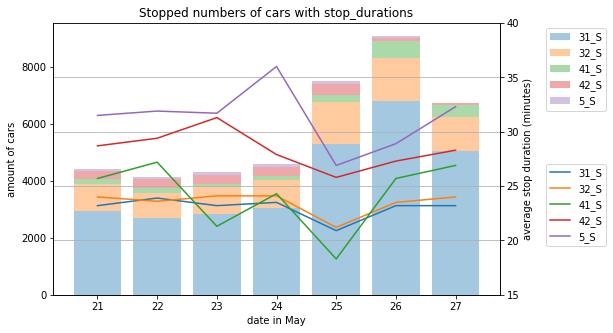

In [259]:
draw_cars_amount(days, df_taian_stD_forDraw, df_taian_stD, "S", "0521_0527")

#### # drawing graphs by a day, time range in 10 minutes, with stop duration

In [208]:
df_stDcnt_dict = {}
df_stDcnt_dict["31_min_df"] = df_taian_stDcnt_31_NS
df_stDcnt_dict["32_min_df"] = df_taian_stDcnt_32_NS
df_stDcnt_dict["41_min_df"] = df_taian_stDcnt_41_NS
df_stDcnt_dict["42_min_df"] = df_taian_stDcnt_42_NS
df_stDcnt_dict["5_min_df"] = df_taian_stDcnt_5_NS

In [210]:
df_stDcnt_dict.keys()

dict_keys(['31_min_df', '32_min_df', '41_min_df', '42_min_df', '5_min_df'])

In [260]:
def drawing_stD_cnt_10min_batch(df_dict, days, col_min) :
    import matplotlib.pyplot as plt
    import numpy as np
    
    XX = col_min
    hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
    categories = ['31', '32', '41', '42', '5']
    #fig, ax1 = plt.subplots(1,1,figsize=(16, 5))
    #variables = {}
    #N=144
    #bottom = np.zeros(N)
    #ax2 = ax1.twinx()
    
    for day in days :
        for dire in directions :
            fig, ax1 = plt.subplots(1,1,figsize=(20, 5))
            variables = {}
            N=144
            bottom = np.zeros(N)
            ax2 = ax1.twinx()
            for category in categories :
            
                #df_dict["{0}_min_df".format(category)][dire][day]["in"]
                
                data = []
                variables["{1}_in_{0}".format(category, dire)] = np.array(df_dict["{0}_min_df".format(category)][dire][day]["in"])
                #variables["{1}_{0}_stD".format(category, dire)] = np.array(df_dict["{0}_min_df".format(category)][dire][day]["stop_duration"])
                data.append(variables["{1}_in_{0}".format(category, dire)])

                for elem in data:
                    ax1.bar(XX, variables["{1}_in_{0}".format(category, dire)], label='{0}_{1}'.format(category, dire), alpha = 0.4, bottom = bottom)
                    bottom += elem

                df_dict["{0}_min_df".format(category)][dire][day]["stop_duration"].fillna(0).plot(linewidth = 1.2, label='{0}_{1}_stD'.format(category, dire))
                #ax2.plot(XX,variables["{1}_{0}_stD".format(cat, direction)], label='{0}_{1}_stD'.format(cat, direction))
    
            label = []
            for hour in hours:
                xticks_label = "{0}:00".format(hour)
                label.append(xticks_label)

            ax1.set_xticks([col_min[i] for i in range(0, 144, 6)])
            ax1.set_xticklabels(label)


            ax1.set_ylabel('amount of cars')
            ax1.set_xlabel('duration of minutes')


            #plt.xticks(rotation=90)
            lgd1 = ax1.legend(bbox_to_anchor=(1.15, 1))

            lgd2 = ax2.legend(bbox_to_anchor=(1.15, 0.5))
            #ax2.set_ylim(15, 30)
            ax2.set_ylabel('average stop duration (minutes)')
            ax2.set_xlabel('minutes duration')


            ax2.margins(0.015625)    
            #ax2.set_xticks(['0:0-0:10', '1:0-1:10'])
            #ax2.set_xticklabels(['0:00', '1:00'])

            plt.grid()
            plt.title('Stopped numbers of cars with stop duration in {0} {1}'.format(day, dire))
            plt.tight_layout()
            plt.show()

            fig.savefig('D://code//graph//{0}_{1}_stD_cnt.png'.format(day, dire), bbox_extra_artists=(lgd1,lgd2), bbox_inches='tight')

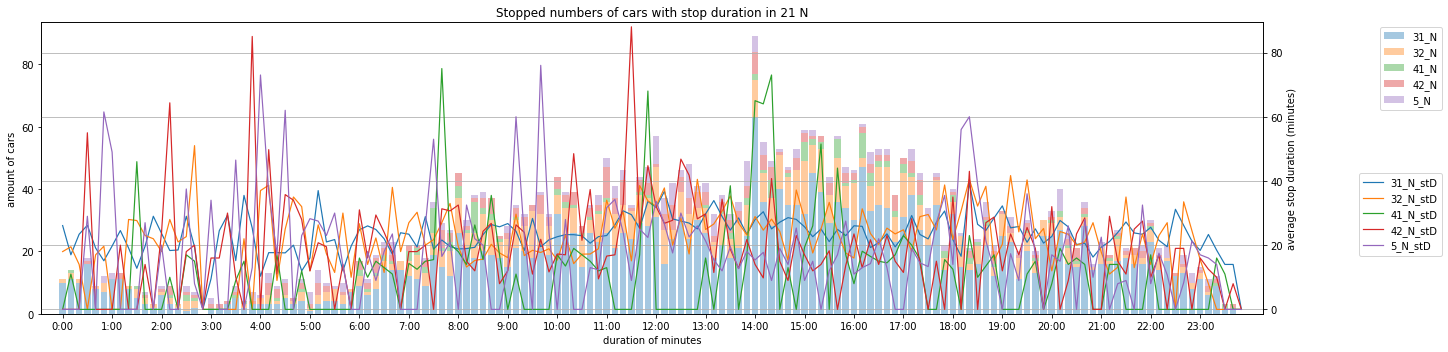

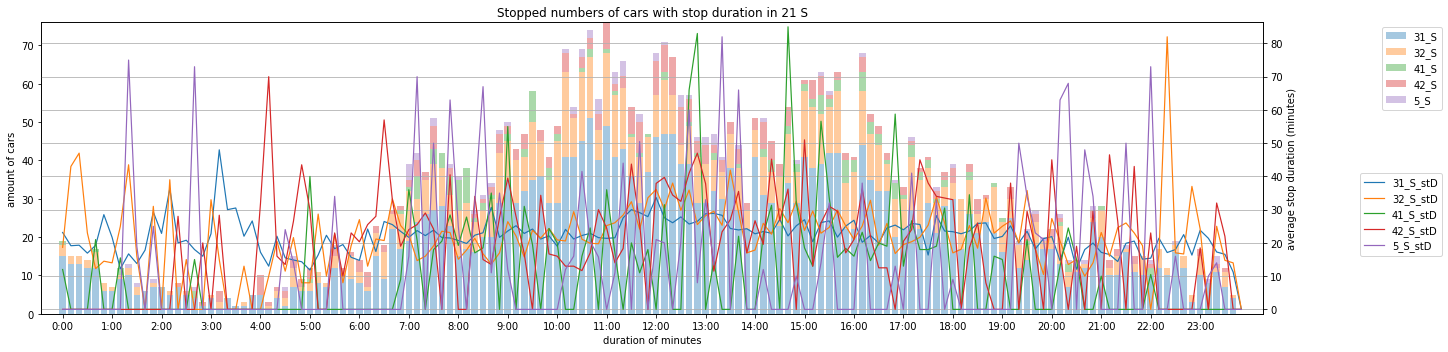

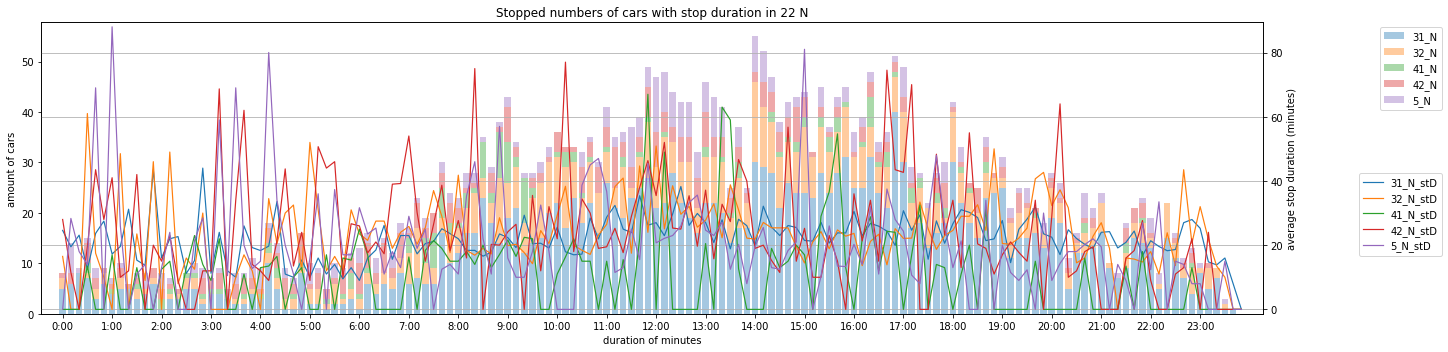

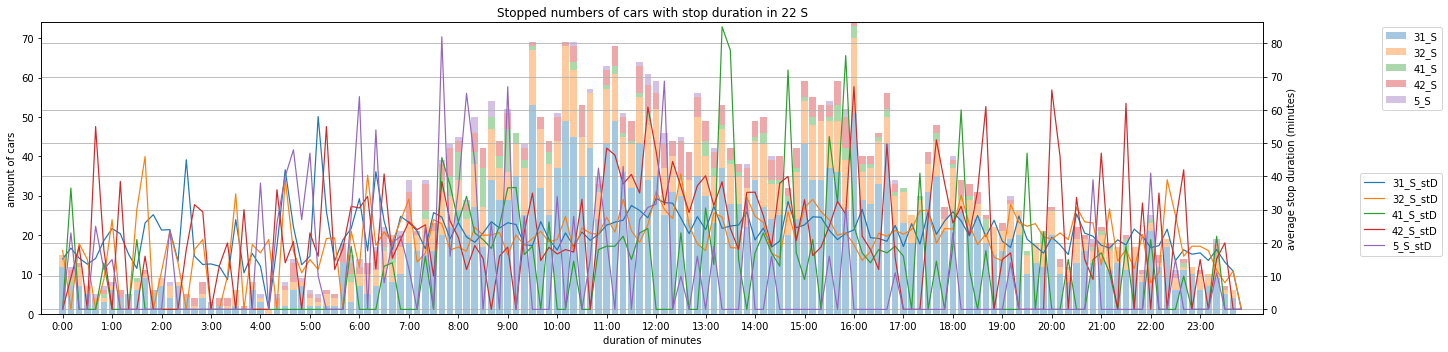

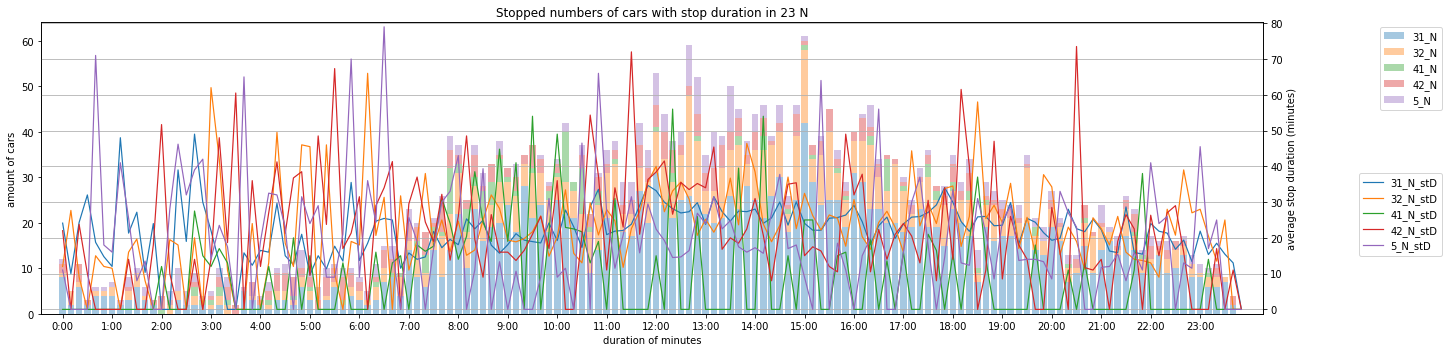

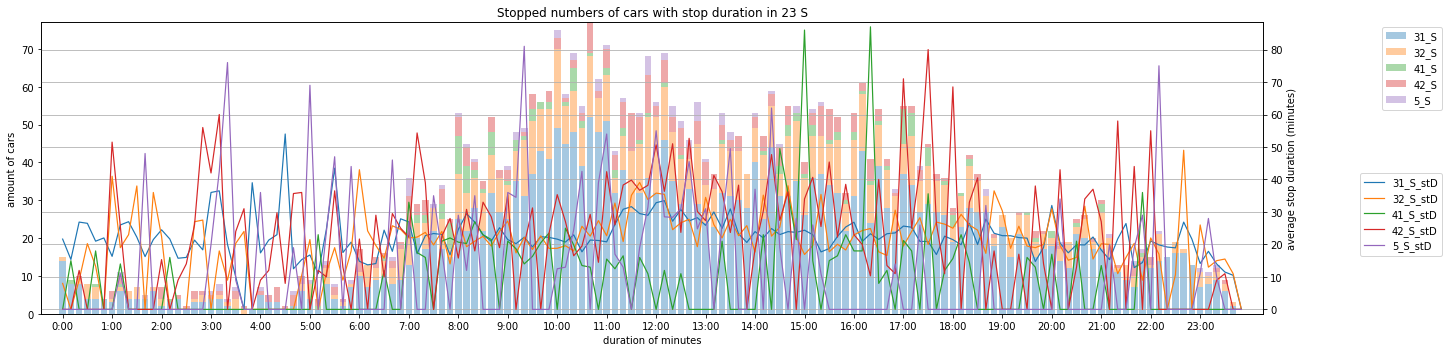

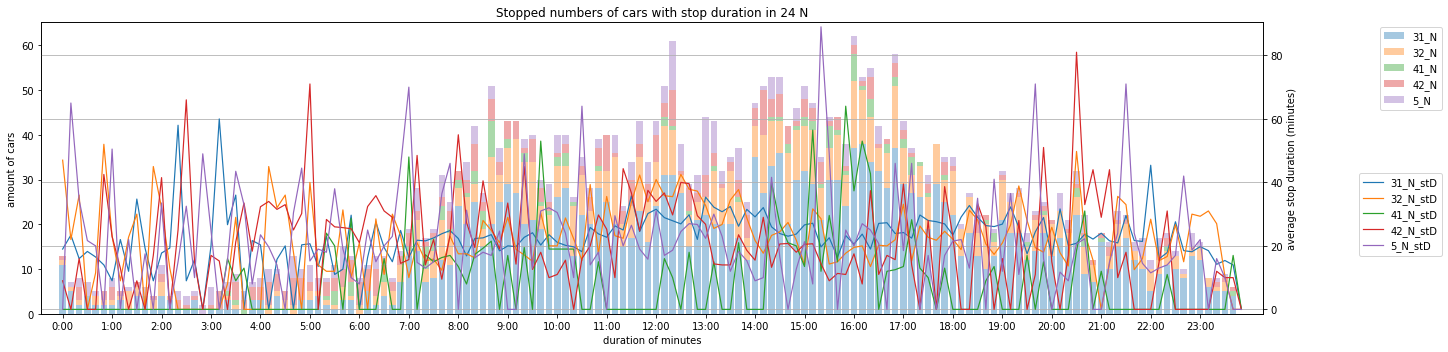

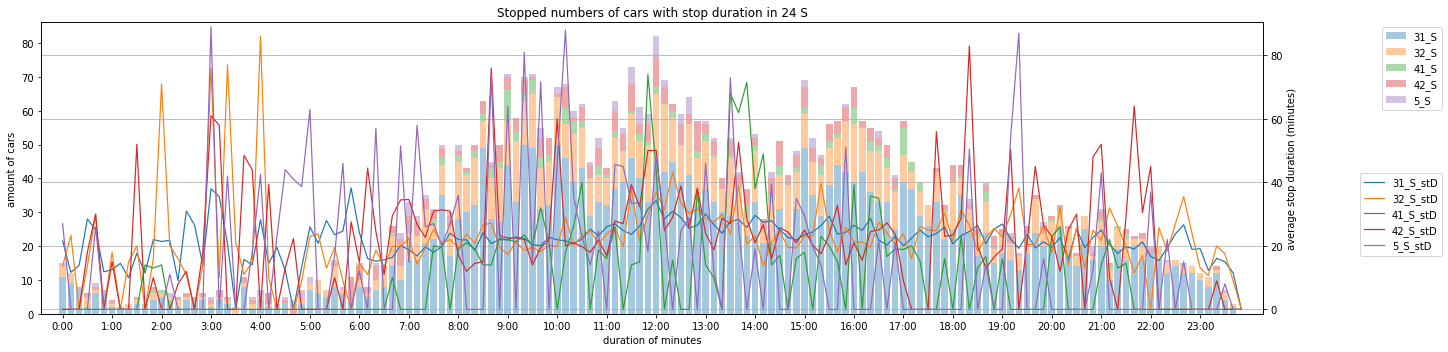

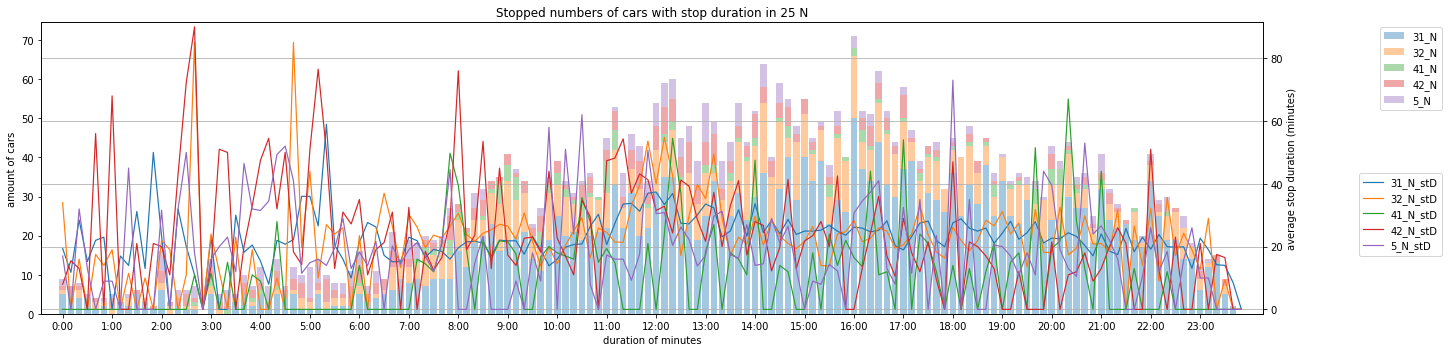

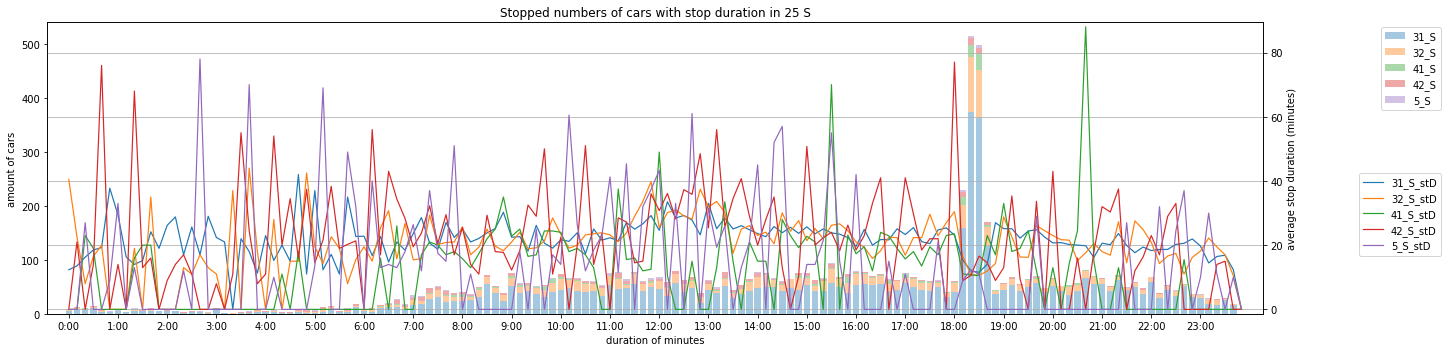

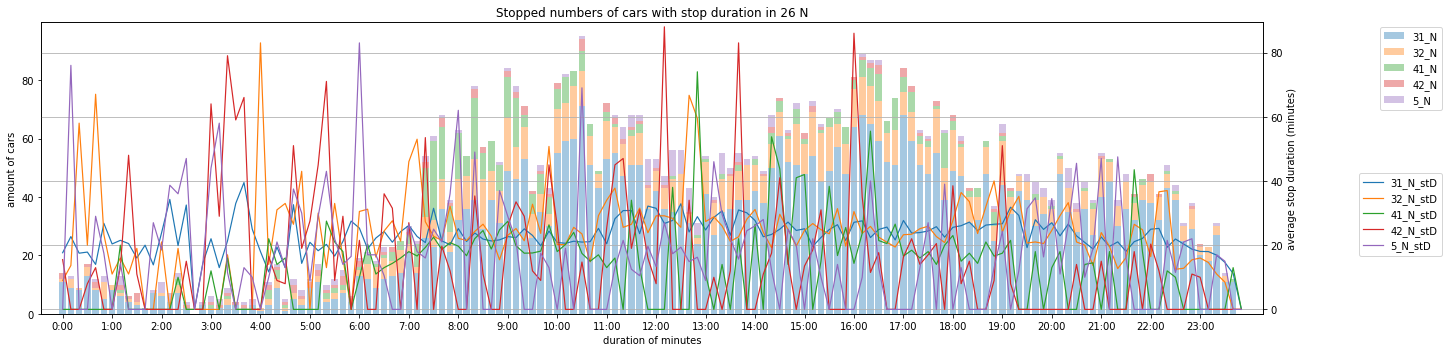

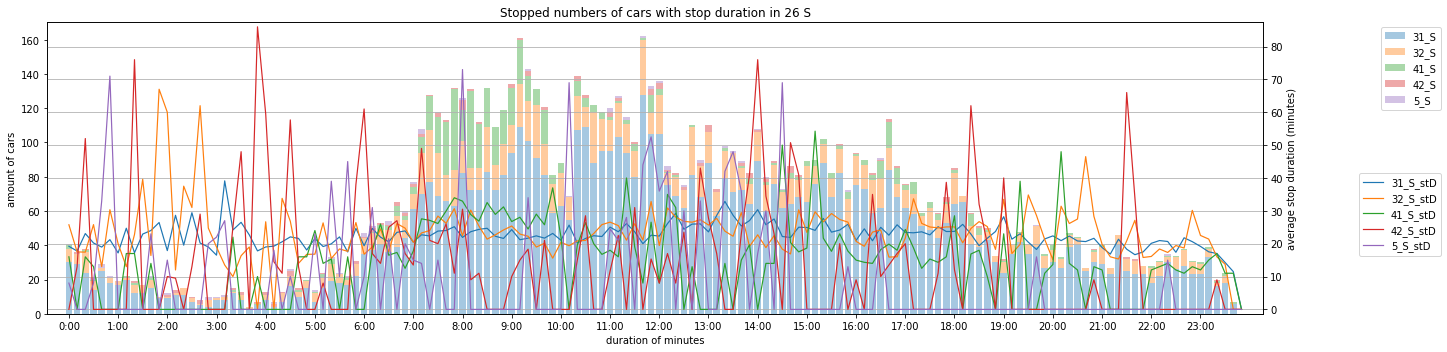

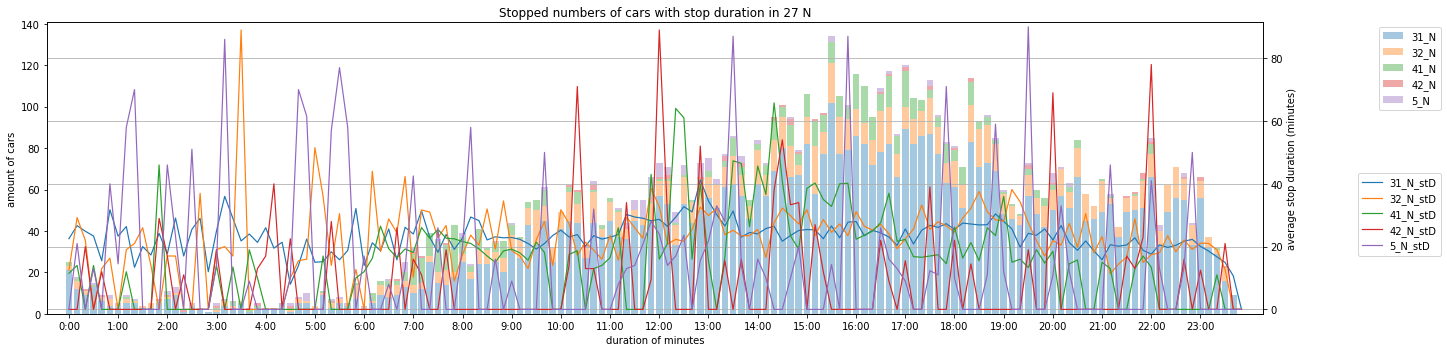

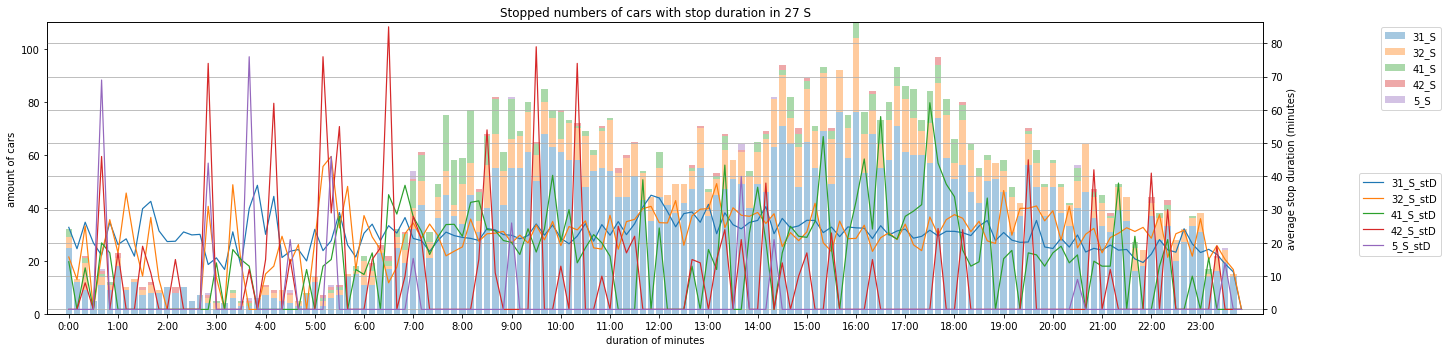

In [261]:
drawing_stD_cnt_10min_batch(df_stDcnt_dict, days, col_min) 